## Import Necessary modules

In [1]:
import pandas as pd     
import numpy as np
import matplotlib.pyplot as plt
import math

## Function to output Water Potential and Water Content for Soil Water Retention Curves (VGM)

In [2]:
def RetCurv_VGM(soil_class):
    def parameter(soil_class):
        if soil_class == "A1":
            a = 10**(-1.479)
            n = 10**(0.511)
            theta_r = 0.055
            phi_vg = 0.374
        elif soil_class == "A2":
            a = 10**(-1.474)
            n = 10**(0.276)
            theta_r = 0.053
            phi_vg = 0.386
        elif soil_class == "A3":
            a = 10**(-1.540)
            n = 10**(0.171)
            theta_r = 0.051
            phi_vg = 0.382
        elif soil_class == "A4":
            a = 10**(-1.672)
            n = 10**(0.140)
            theta_r = 0.055
            phi_vg = 0.387
        elif soil_class == "B1":
            a = 10**(-2.034)
            n = 10**(0.208)
            theta_r = 0.057
            phi_vg = 0.487
        elif soil_class == "B2":
            a = 10**(-2.278)
            n = 10**(0.206)
            theta_r = 0.053
            phi_vg = 0.425
        elif soil_class == "B3":
            a = 10**(-2.234)
            n = 10**(0.186)
            theta_r = 0.056
            phi_vg = 0.413
        elif soil_class == "B4":
            a = 10**(-2.016)
            n = 10**(0.160)
            theta_r = 0.072
            phi_vg = 0.470
        elif soil_class == "C1":
            a = 10**(-1.940)
            n = 10**(0.135)
            theta_r = 0.072
            phi_vg = 0.475
        elif soil_class == "C2":
            a = 10**(-1.444)
            n = 10**(0.106)
            theta_r = 0.091
            phi_vg = 0.436
        elif soil_class == "C3":
            a = 10**(-1.888)
            n = 10**(0.124)
            theta_r = 0.069
            phi_vg = 0.500
        elif soil_class == "C4":
            a = 10**(-1.830)
            n = 10**(0.137)
            theta_r = 0.064
            phi_vg = 0.421
        return (a,n,theta_r,phi_vg)

    #create array representing water content (t) and apply to solve for water potential (h)
    a,n,theta_r,phi_vg = parameter(soil_class)
    t = np.linspace(theta_r, 1, num=50)
    S = (t-theta_r)/(phi_vg-theta_r)
    h = (1/a)*((S**((n-1)/n)-1)**(1/n))  #devisded by 1000 to make both in units of MPa (assuming that it is orinally in units of Pa****)
    
    return (t,h)
    

## WREF Site Soil Water Retention Curves (based on soil texture data)

/opt/jupyterhub/lib/python3.6/site-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in power


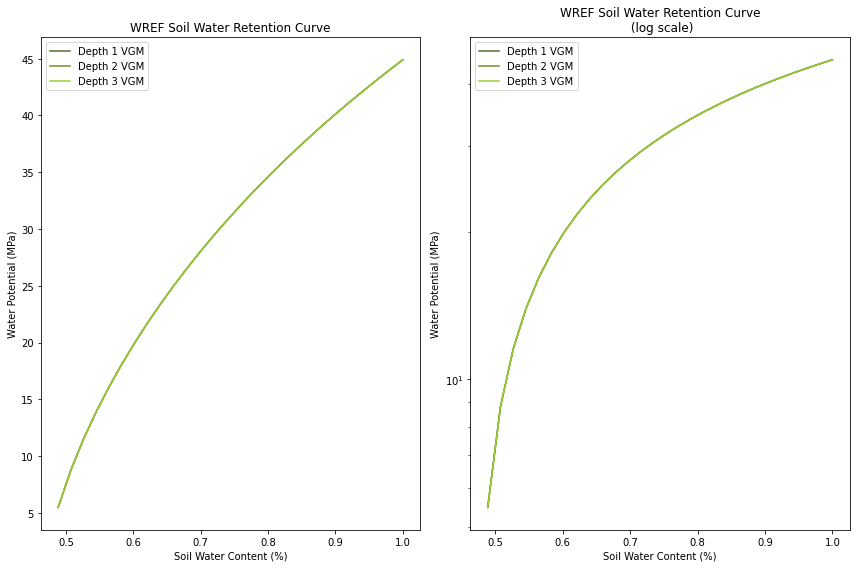

In [3]:
#soil class (according to Twarakavi et al. (2010))
WREF_A1_sc = "B4"
WREF_Bw1_sc = "B4"
WREF_Bw2_sc = "B4" 

#Return retention variables for the three depths using the van genuchten mualem model
t_W_A1_VG,h_W_A1 = RetCurv_VGM(WREF_A1_sc)
t_W_Bw1_VG,h_W_Bw1 = RetCurv_VGM(WREF_Bw1_sc)
t_W_Bw2_VG,h_W_Bw2 = RetCurv_VGM(WREF_Bw2_sc)

#Plot curves one is normal scale, one is log scale (I noticed most examples had the pressure at a base ten log scale)
plt.figure(figsize=(12,8))
plt.subplot(1, 2, 1)
plt.plot(t_W_A1_VG, h_W_A1, color = 'darkolivegreen', label = 'Depth 1 VGM')
plt.plot(t_W_Bw1_VG, h_W_Bw1, color = 'olivedrab', label = 'Depth 2 VGM')
plt.plot(t_W_Bw2_VG, h_W_Bw2, color = 'yellowgreen', label = 'Depth 3 VGM')
plt.xlabel("Soil Water Content (%)") 
plt.ylabel("Water Potential (MPa)")
plt.legend()
plt.title("WREF Soil Water Retention Curve")

plt.subplot(1, 2, 2)
plt.plot(t_W_A1_VG, h_W_A1, color = 'darkolivegreen', label = 'Depth 1 VGM')
plt.plot(t_W_Bw1_VG, h_W_Bw1, color = 'olivedrab', label = 'Depth 2 VGM')
plt.plot(t_W_Bw2_VG, h_W_Bw2, color = 'yellowgreen', label = 'Depth 3 VGM')
plt.xlabel("Soil Water Content (%)") 
plt.ylabel("Water Potential (MPa)")
plt.yscale('log')
plt.legend()
plt.title("WREF Soil Water Retention Curve\n (log scale)")
    
plt.tight_layout()
plt.show()

## YELL Site Soil Water Retention Curve (based on soil texture data)

/opt/jupyterhub/lib/python3.6/site-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in power


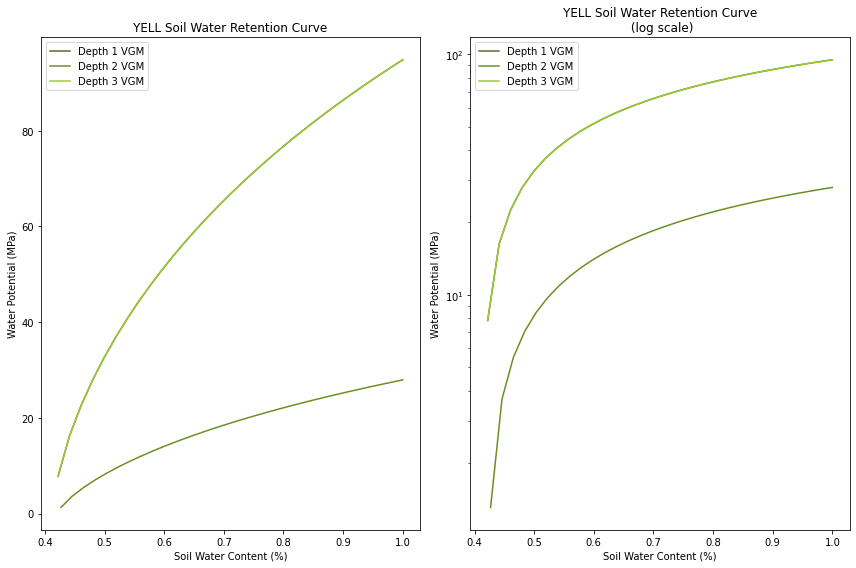

In [4]:
#soil class (according to Twarakavi et al. (2010))
YELL_A_sc = "B3"
YELL_Bt1_sc = "C4"  #this one is a close call between C4 and B3
YELL_Bw_sc = "B3"

#Return retention variables for the four depths using the van genuchten mualem model
t_Y_A_VG,h_Y_A = RetCurv_VGM(YELL_A_sc)
t_Y_Bt1_VG,h_Y_Bt1 = RetCurv_VGM(YELL_Bt1_sc)
t_Y_Bw_VG,h_Y_Bw = RetCurv_VGM(YELL_Bw_sc)

#Plot curves one is normal scale, one is log scale (I noticed most examples had the pressure at a base ten log scale)
plt.figure(figsize=(12,8))
plt.subplot(1, 2, 1)
plt.plot(t_Y_A_VG,h_Y_A, color = 'darkolivegreen', label = 'Depth 1 VGM')
plt.plot(t_Y_Bt1_VG,h_Y_Bt1, color = 'olivedrab', label = 'Depth 2 VGM')
plt.plot(t_Y_Bw_VG, h_Y_Bw, color = 'yellowgreen', label = 'Depth 3 VGM')
plt.xlabel("Soil Water Content (%)") 
plt.ylabel("Water Potential (MPa)")
plt.legend()
plt.title("YELL Soil Water Retention Curve")

plt.subplot(1, 2, 2)
plt.plot(t_Y_A_VG,h_Y_A, color = 'darkolivegreen', label = 'Depth 1 VGM')
plt.plot(t_Y_Bt1_VG,h_Y_Bt1, color = 'olivedrab', label = 'Depth 2 VGM')
plt.plot(t_Y_Bw_VG, h_Y_Bw, color = 'yellowgreen', label = 'Depth 3 VGM')
plt.xlabel("Soil Water Content (%)") 
plt.ylabel("Water Potential (MPa)")
plt.yscale('log')
plt.legend()
plt.title("YELL Soil Water Retention Curve\n (log scale)")
    
plt.tight_layout()
plt.show()

## TEAK Site Soil Water Retention Curve (based on soil texture data)

/opt/jupyterhub/lib/python3.6/site-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in power


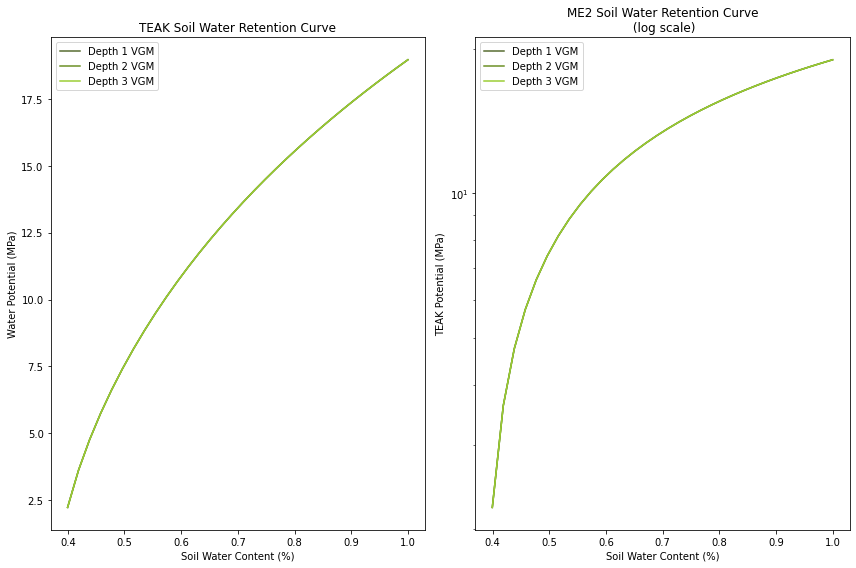

In [6]:
#soil class (according to Twarakavi et al. (2010))
TEAK_A_sc = "A3"
TEAK_B_sc = "A3"
TEAK_C_sc = "A3"

#Return retention variables for the three depths using the van genuchten mualem model
t_T_A_VG,h_T_A = RetCurv_VGM(TEAK_A_sc)
t_T_B_VG,h_T_B = RetCurv_VGM(TEAK_B_sc)
t_T_C_VG,h_T_C = RetCurv_VGM(TEAK_C_sc)

#Plot curves one is normal scale, one is log scale (I noticed most examples had the pressure at a base ten log scale)
plt.figure(figsize=(12,8))
plt.subplot(1, 2, 1)
plt.plot(t_T_A_VG, h_T_A, color = 'darkolivegreen', label = 'Depth 1 VGM')
plt.plot(t_T_B_VG, h_T_B, color = 'olivedrab', label = 'Depth 2 VGM')
plt.plot(t_T_C_VG, h_T_C, color = 'yellowgreen', label = 'Depth 3 VGM')
plt.xlabel("Soil Water Content (%)") 
plt.ylabel("Water Potential (MPa)")
plt.legend()
plt.title("TEAK Soil Water Retention Curve")

plt.subplot(1, 2, 2)
plt.plot(t_T_A_VG, h_T_A, color = 'darkolivegreen', label = 'Depth 1 VGM')
plt.plot(t_T_B_VG, h_T_B, color = 'olivedrab', label = 'Depth 2 VGM')
plt.plot(t_T_C_VG, h_T_C, color = 'yellowgreen', label = 'Depth 3 VGM')
plt.xlabel("Soil Water Content (%)") 
plt.ylabel("TEAK Potential (MPa)")
plt.yscale('log')
plt.legend()
plt.title("ME2 Soil Water Retention Curve\n (log scale)")
    
plt.tight_layout()
plt.show()

## US-Me2 Site Soil Water Retention Curve (based on soil texture data)

/opt/jupyterhub/lib/python3.6/site-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in power


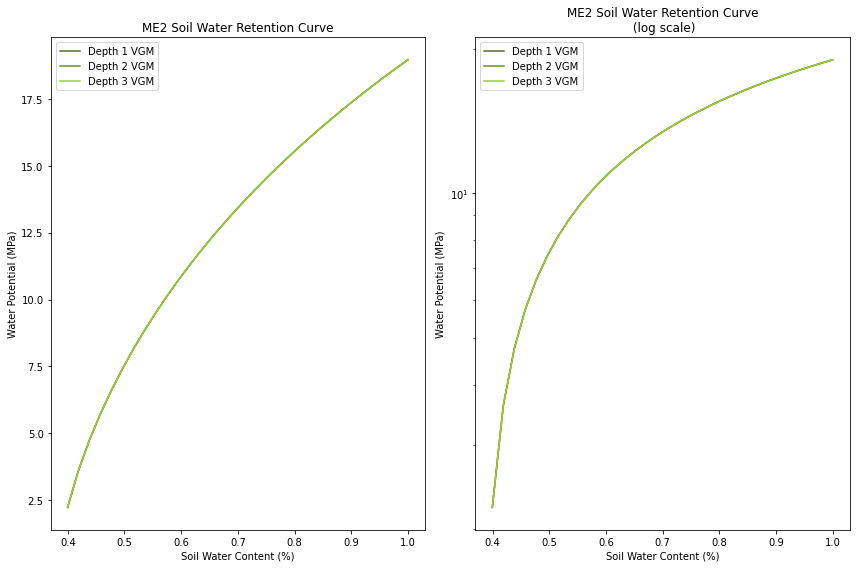

In [7]:
#soil class (according to Twarakavi et al. (2010))
ME2_A_sc = "A3"
ME2_B_sc = "A3"
ME2_C_sc = "A3"

#Return retention variables for the three depths using the van genuchten mualem model
t_M_A_VG,h_M_A = RetCurv_VGM(ME2_A_sc)
t_M_B_VG,h_M_B = RetCurv_VGM(ME2_B_sc)
t_M_C_VG,h_M_C = RetCurv_VGM(ME2_C_sc)

#Plot curves one is normal scale, one is log scale (I noticed most examples had the pressure at a base ten log scale)
plt.figure(figsize=(12,8))
plt.subplot(1, 2, 1)
plt.plot(t_M_A_VG, h_M_A, color = 'darkolivegreen', label = 'Depth 1 VGM')
plt.plot(t_M_B_VG, h_M_B, color = 'olivedrab', label = 'Depth 2 VGM')
plt.plot(t_M_C_VG, h_M_C, color = 'yellowgreen', label = 'Depth 3 VGM')
plt.xlabel("Soil Water Content (%)") 
plt.ylabel("Water Potential (MPa)")
plt.legend()
plt.title("ME2 Soil Water Retention Curve")

plt.subplot(1, 2, 2)
plt.plot(t_M_A_VG, h_M_A, color = 'darkolivegreen', label = 'Depth 1 VGM')
plt.plot(t_M_B_VG, h_M_B, color = 'olivedrab', label = 'Depth 2 VGM')
plt.plot(t_M_C_VG, h_M_C, color = 'yellowgreen', label = 'Depth 3 VGM')
plt.xlabel("Soil Water Content (%)") 
plt.ylabel("Water Potential (MPa)")
plt.yscale('log')
plt.legend()
plt.title("ME2 Soil Water Retention Curve\n (log scale)")
    
plt.tight_layout()
plt.show()